# Day 13. Task 05
# Регрессия

## 0. Импорты

In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

## 1. Препроцессинг

**1. Прочитайте файл из: `datasets/checker_regression.csv`.**

In [227]:
df = pd.read_csv('../data/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


**2. Заполните пропущенные значения нулями.**

- [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

- [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [228]:
df.fillna(0, inplace=True)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [229]:
df = pd.get_dummies(df)
df

,num_commits,pageviews,AVG(diff),uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,128,0.0,-104.75,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,40,0.0,-175.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
74,15,0.0,-62.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
75,8,0.0,-115.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [230]:
df[['num_commits', 'pageviews', 'AVG(diff)']] = StandardScaler().fit_transform(df[['num_commits', 'pageviews', 'AVG(diff)']])
df

,num_commits,pageviews,AVG(diff),uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,0.406864,-0.476157,0.434276,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.406864,-0.476157,0.434276,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.406864,-0.476157,0.434276,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.406864,-0.476157,0.434276,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.406864,-0.476157,0.434276,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2.585669,-0.775718,-1.697071,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,-0.319404,-0.775718,-3.138654,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
74,-1.144708,-0.775718,-0.839445,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
75,-1.375794,-0.775718,-1.915801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [231]:
X = df.drop(columns='AVG(diff)', axis=1)
y = df['AVG(diff)']

**3. Разбейте ваш датасет на train и test, используя параметр `test_size=0.2`.**

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [234]:
X_train.shape

(61, 31)

In [235]:
y_train.shape

(61,)

## 2. Кросс-валидация

**1. Напишите функцию `crossval`, которая на вход примет: `n_splits` для `KFold()`, `X`, `y`, созданный класс модели с ее параметрами (не забывайте про `random_state=21`). И вернет в качестве результата что-то такое:**

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Средний RMSE на кросс-валидации – 3164.0686140637476
```

- [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

- [Введение в кросс-валидацию k-fold](https://www.codecamp.ru/blog/cross-validation-k-fold/)

- [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

- [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


In [216]:
def crossval(n_splits, X, y, model_class):
    
    X = np.array(X)
    y = np.array(y)
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    
    RMSE = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]     
        model_class.fit(X_train, y_train)
        pred_train= model_class.predict(X_train)
        pred_test= model_class.predict(X_test)
        RMSE_train = mean_squared_error(pred_train, y_train)
        RMSE_test = mean_squared_error(pred_test, y_test)
        print('train - {}   |   test - {}'.format(RMSE_train, RMSE_test))       
        RMSE.append(np.sqrt(RMSE_test))
        
    print('Средний RMSE на кросс-валидации – {}'.format(np.array(RMSE).mean()))

**2. Запустите эту функцию для `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Вы можете использовать любые гиперпараметры для этих моделей, но постарайтесь найти наилучшие для себя.**

In [217]:
logres = crossval(10, X_train, y_train, LinearRegression())

train - 1.1149886090075179e-30   |   test - 0.7179682110719527
train - 2.7439564323478863e-30   |   test - 0.009642275522443969
train - 2.4195597958969163e-30   |   test - 2.0399449970949602e-30
train - 1.3842358848472659e-30   |   test - 1.9012780410990792e-30
train - 1.791440505525271e-30   |   test - 3.043326084162023
train - 1.3754956645905559e-30   |   test - 1.1535036413583284e-30
train - 4.403726360111614e-30   |   test - 0.34322373174480364
train - 1.0348791963170372e-30   |   test - 0.6674418461747057
train - 1.1420309350411272e-30   |   test - 1.0027803931752577
train - 6.0907359406705935e-31   |   test - 0.5999792464368091
Средний RMSE на кросс-валидации – 0.5868834915235353


In [218]:
dtr = crossval(10, X_train, y_train, DecisionTreeRegressor())

train - 2.4537774106267004e-33   |   test - 0.2100019537658975
train - 2.4091632758880333e-33   |   test - 0.8639905236279084
train - 0.0   |   test - 0.0
train - 0.0   |   test - 0.0
train - 2.465190328815662e-33   |   test - 0.06340216093795334
train - 0.0   |   test - 0.0
train - 2.465190328815662e-33   |   test - 2.3731139110182515
train - 2.465190328815662e-33   |   test - 0.6592421278467154
train - 2.5212173817432907e-33   |   test - 1.9215797403459802
train - 2.4091632758880333e-33   |   test - 0.2273382909728293
Средний RMSE на кросс-валидации – 0.5855007805668337


In [219]:
rfr = crossval(10, X_train, y_train, RandomForestRegressor())

train - 0.06827724189518013   |   test - 0.2863913966724347
train - 0.055070235278129744   |   test - 0.3366443543172939
train - 0.04906728379811989   |   test - 3.0814879110195774e-33
train - 0.05293621395524561   |   test - 3.0814879110195774e-33
train - 0.06373648793762812   |   test - 0.12607949521438555
train - 0.05761185113491408   |   test - 3.0814879110195774e-33
train - 0.04049618695412577   |   test - 1.3313156867629532
train - 0.041781013067219465   |   test - 0.8026498109276136
train - 0.049596874621838746   |   test - 0.607592042930918
train - 0.04863334538048881   |   test - 0.39744500577461545
Средний RMSE на кросс-валидации – 0.49300909452754366


## 3. Прогнозы и оценка качества

**1. Сделайте прогноз для тестового датасета, используя каждую из тех трех моделей с финализированными гиперпараметрами.**

In [220]:
log = LinearRegression()
log_fit = log.fit(X_test, y_test)
log_fit.score(X_test, y_test)

1.0

In [221]:
DTR = DecisionTreeRegressor()
DTR_fit = DTR.fit(X_test, y_test)
DTR_fit.score(X_test, y_test)

1.0

In [222]:
RFR = RandomForestRegressor()
RFR_fit = RFR.fit(X_test, y_test)
RFR_fit.score(X_test, y_test)

0.8740757953818529

**2. Нарисуйте график для каждой модели, где по оси икс – реальная средняя разница, а по оси игрек – то, что было спрогнозировано моделью.**

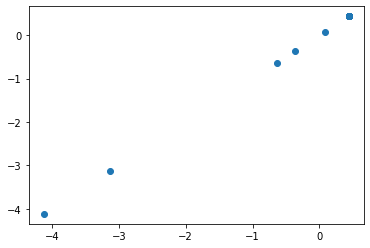

In [223]:
plt.scatter(log_fit.predict(X_test), y_test)
plt.show()

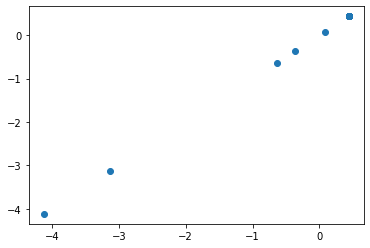

In [224]:
plt.scatter(DTR_fit.predict(X_test), y_test)
plt.show()

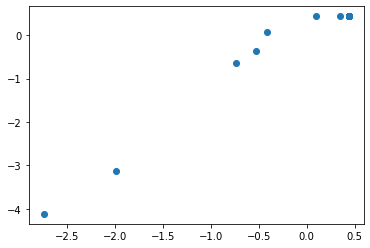

In [225]:
plt.scatter(RFR_fit.predict(X_test), y_test)
plt.show()

**3. Как выглядел бы график для идеального случая? Запишите ответ в markdown-ячейку в конце этой секции.**

**Ответ:**

        "прямая линия из точек по диагонали вправо вверх"